#### 打卡汇总

| 任务名称                          | 难度 | 所需技能 |
| --------------------------------- | ---- | -------- |
| PyTorch张量计算与Numpy的转换      | 低   | PyTorch  |
| 梯度计算和梯度下降过程            | 低   | PyTorch  |
| PyTorch全连接层原理和使用         | 中   | PyTorch  |
| PyTorch激活函数原理和使用         | 低   | PyTorch  |
| PyTorch卷积层原理和使用           | 中   | PyTorch  |
| PyTorch常见的损失函数和优化器使用 | 中   | PyTorch  |
| PyTorch池化层和归一化层           | 中   | PyTorch  |
| 使用PyTorch搭建VGG网络            | 高   | PyTorch  |
| 使用PyTorch搭建ResNet网络         | 高   | PyTorch  |
| 使用PyTorch完成Fashion-MNIST分类  | 高   | PyTorch  |
| 使用PyTorch完成人脸关键点检测     | 高   | PyTorch  |
| 使用PyTorch搭建对抗生成网络       | 高   | PyTorch  |

#### 任务1：PyTorch张量计算与Numpy的转换

任务要点：Pytorch基础使用、张量计算

- 步骤1：配置本地Notebook环境

- 步骤2：学习Pytorch的基础语法，并成功执行以下代码

In [1]:
import numpy as np
import torch

c = np.ones((3, 3))
d = torch.from_numpy(c)

In [2]:
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**任务2：梯度计算和梯度下降过程**

任务要点：Pytorch梯度计算、随机梯度下降

- 步骤1：学习自动求梯度原理，https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

- 步骤2：学习随机梯度下降原理，https://www.cnblogs.com/BYRans/p/4700202.html

- 步骤3：

    - 使用numpy创建一个 [y=10*x+b+noise(0,1)](#)的数据，其中x是0到100的范围，以0.01进行等差数列
    - 使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

In [3]:
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 1e-3
epochs = 1
N = 10000

for epoch in range(epochs):
    for i in range(N):
        xi, yi = x[i], y[i]
        yi_hat = w * xi + b
        loss = 0.5 * (yi_hat - yi) ** 2
        loss.backward()
        torch.nn.utils.clip_grad_norm_([w, b], max_norm=10, norm_type=2)
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        w.grad.data.zero_()
        b.grad.data.zero_()

In [4]:
print(w)
print(b)

tensor([9.9873], requires_grad=True)
tensor([2.5493], requires_grad=True)


**任务3：PyTorch全连接层原理和使用**

任务要点：全连接网络

- 步骤1：学习全连接网络原理，https://blog.csdn.net/xiaodong_11/article/details/82015456

- 步骤2：在pytorch中使用矩阵乘法实现全连接层

- 步骤3：在pytorch中使用nn.Linear层



In [5]:
from torch import nn

class MyLinear_1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_1, self).__init__()
        self.w = torch.randn(input_dim, output_dim, requires_grad=True)
        self.b = torch.randn(output_dim, requires_grad=True)
    def forward(self, x):
        return x @ self.w + self.b

In [6]:
model = MyLinear_1(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])


In [7]:
from torch import nn

class MyLinear_2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_2, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

In [8]:
model = MyLinear_2(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])




**任务4：PyTorch激活函数原理和使用**

任务要点：激活函数

- 步骤1：学习激活函数的原理，https://zhuanlan.zhihu.com/p/88429934

- 步骤2：在pytorch中手动实现上述激活函数

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# torch.nn.ELU

def elu(x, alpha=1.0):
    return max(0, x) + min(0, alpha * (np.exp(x) - 1))

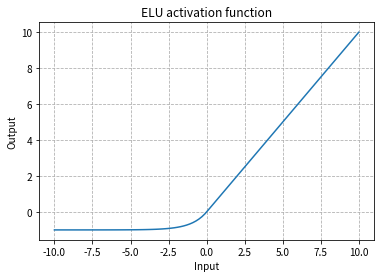

In [11]:
x = np.linspace(-10, 10, 100)
y = [elu(xi) for xi in x]
plt.plot(x, y)
plt.title('ELU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [12]:
# torch.nn.LeakyReLU

def leaky_relu(x, negative_slope=0.01):
    return max(0, x) + negative_slope * min(0, x)

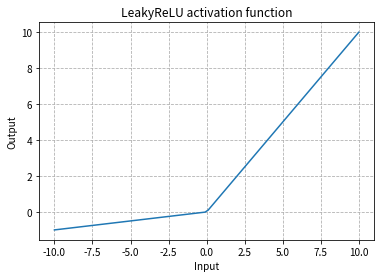

In [13]:
x = np.linspace(-10, 10, 100)
y = [leaky_relu(xi, negative_slope=0.1) for xi in x]
plt.plot(x, y)
plt.title('LeakyReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [14]:
# torch.nn.ReLU

def relu(x):
    return max(0, x)

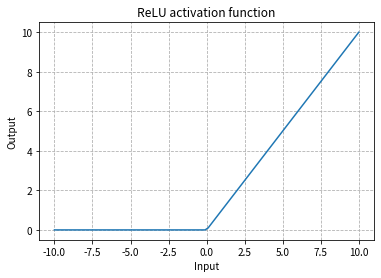

In [15]:
x = np.linspace(-10, 10, 100)
y = [relu(xi) for xi in x]
plt.plot(x, y)
plt.title('ReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [16]:
# torch.nn.Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

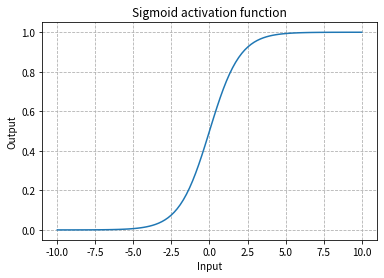

In [17]:
x = np.linspace(-10, 10, 100)
y = [sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('Sigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [18]:
# torch.nn.LogSigmoid

def log_sigmoid(x):
    return np.log(sigmoid(x))

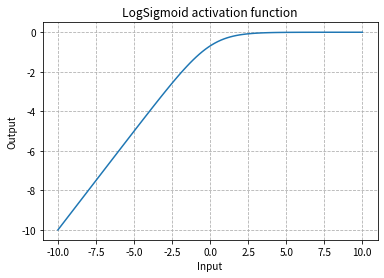

In [19]:
x = np.linspace(-10, 10, 100)
y = [log_sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('LogSigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [20]:
# torch.nn.Tanh

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

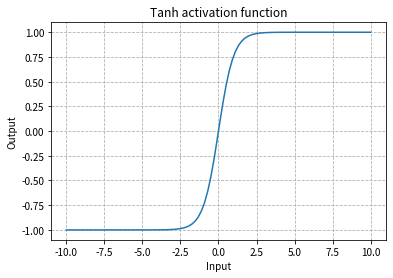

In [21]:
x = np.linspace(-10, 10, 100)
y = [tanh(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanh activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [22]:
# torch.nn.Tanhshrink

def tanhshrink(x):
    return x - tanh(x)

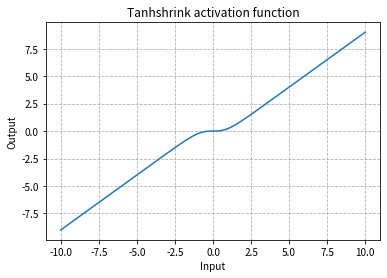

In [23]:
x = np.linspace(-10, 10, 100)
y = [tanhshrink(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanhshrink activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()



**任务5：PyTorch卷积层原理和使用**

任务要点：卷积层

- 步骤1：理解卷积层的原理和具体使用

- https://blog.csdn.net/qq_37385726/article/details/81739179

- https://www.cnblogs.com/zhangxiann/p/13584415.html

- 步骤2：计算下如下卷积层的参数量
```python
nn.Conv2d(
      in_channels=1,
      out_channels=32,
      kernel_size=5,    
      stride=1, 
      padding=2)
```

参数数量：in_channels * out_channels * kernel_size * kernel_size = 800

**任务6：PyTorch常见的损失函数和优化器使用**

任务要点：损失函数、优化器

- 步骤1：学习损失函数的细节，https://www.cnblogs.com/wanghui-garcia/p/10862733.html
- 步骤2：学习优化器的使用，https://pytorch.org/docs/stable/optim.html
- 步骤3：设置不同的优化器和学习率，重复任务2的回归过程
  - 损失函数MSE、优化器SGD、学习率0.1
  - 损失函数MSE、优化器SGD、学习率0.5
  - 损失函数MSE、优化器SGD、学习率0.01

In [24]:
import torch
from torch import nn
import numpy as np
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer_1 = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer_2 = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer_3 = torch.optim.SGD(model.parameters(), lr=0.001)

In [25]:
def train(model, x, y, optimizer, epochs):
    nn.init.xavier_uniform_(model.weight)
    nn.init.zeros_(model.bias)
    total_loss = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        inputs = torch.from_numpy(x).view(-1, 1).float()
        outputs = torch.from_numpy(y).view(-1, 1).float()
        predicts = model(inputs)
        loss = loss_fn(predicts, outputs)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=10, norm_type=2)
        optimizer.step()
        total_loss.append(loss.item())
    return total_loss

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_xy(model, x, y):
    with torch.no_grad():
        y_pred = model(torch.from_numpy(x).view(-1, 1).float()).detach().numpy()
    plt.plot(x, y_pred, label='true')
    plt.plot(x, y, 'ro', label='predict')
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def plot_loss(loss):
    i = range(len(loss))
    plt.plot(i, loss)
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

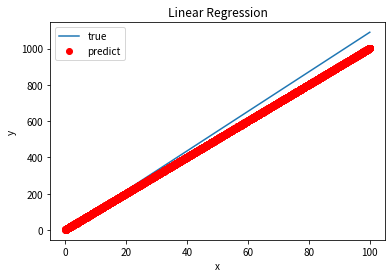

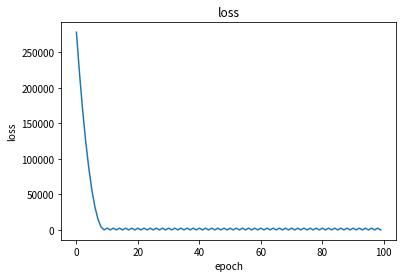

In [27]:
loss_1 = train(model, x, y, optimizer_1, epochs=100)
plot_xy(model, x, y)
plot_loss(loss_1)

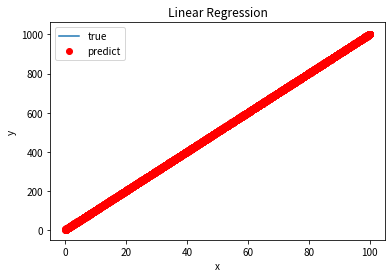

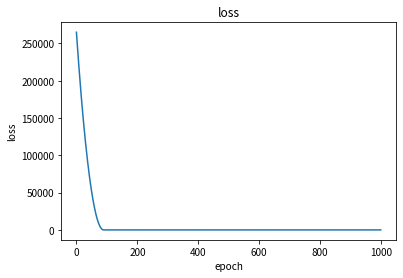

In [28]:
loss_2 = train(model, x, y, optimizer_2, epochs=1000)
plot_xy(model, x, y)
plot_loss(loss_2)

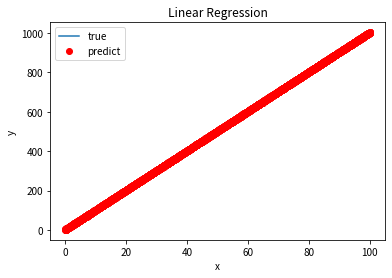

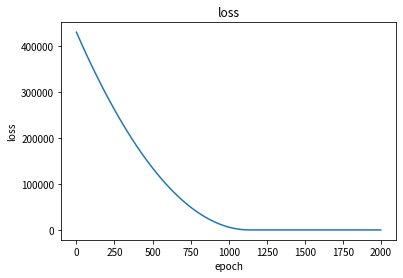

In [29]:
loss_3 = train(model, x, y, optimizer_3, epochs=2000)
plot_xy(model, x, y)
plot_loss(loss_3)

**任务7：PyTorch池化层和归一化层**

任务要点：池化层、归一化层

- 步骤1：使用pytroch代码实现2d pool中的mean-pooling、max-pooling
  - https://pytorch.org/docs/stable/nn.html#pooling-layers

  - https://blog.csdn.net/shanglianlm/article/details/85313924

- 步骤2：学习归一化的原理，https://blog.csdn.net/qq_23981335/article/details/106572171

In [30]:
import torch

def pool2d(inputs, kernel_size, stride=None, padding=0, mode='mean'):
    height, width = inputs.shape
    if isinstance(kernel_size, int):
        kernel_height = kernel_width = kernel_size
    else:
        kernel_height, kernel_width = kernel_size
    if stride is None:
        stride_height, stride_width = kernel_height, kernel_width
    elif isinstance(stride, int):
        stride_height = stride_width = stride
    else:
        stride_height, stride_width = stride
    if isinstance(padding, int):
        padding_height = padding_width = padding
    else:
        padding_height, padding_width = padding
    
    outputs_height = (height + 2 * padding_height - kernel_height) // stride_height + 1
    outputs_width = (width + 2 * padding_width - kernel_width) // stride_width + 1
    
    padding_top = torch.zeros(padding_height, width)
    padding_left = torch.zeros(height + 2 * padding_height, padding_width)
    inputs = torch.cat((padding_top, inputs, padding_top), dim=0)
    inputs = torch.cat((padding_left, inputs, padding_left), dim=1)
    
    outputs = torch.zeros(outputs_height, outputs_width)
    
    for x in range(0, inputs.shape[0]-kernel_height+1, stride_height):
        for y in range(0, inputs.shape[1]-kernel_width+1, stride_width):
            inputs_part = inputs[x:x+kernel_height, y:y+kernel_width]
            i, j = x // stride_height, y // stride_width
            if mode == 'mean':
                outputs[i, j] = torch.mean(inputs_part)
            elif mode == 'max':
                outputs[i, j] = torch.max(inputs_part)
    return outputs 

In [31]:
inputs = torch.randint(1, 10, size=(6,6))
outputs = pool2d(inputs, kernel_size=3, stride=1, mode='mean')

In [32]:
inputs, outputs

(tensor([[7, 1, 3, 1, 7, 4],
         [6, 3, 1, 6, 2, 2],
         [9, 5, 6, 9, 1, 6],
         [9, 9, 3, 7, 6, 6],
         [5, 5, 5, 6, 3, 8],
         [4, 1, 5, 7, 2, 3]]),
 tensor([[4.5556, 3.8889, 4.0000, 4.2222],
         [5.6667, 5.4444, 4.5556, 5.0000],
         [6.2222, 6.1111, 5.1111, 5.7778],
         [5.1111, 5.3333, 4.8889, 5.3333]]))

In [33]:
outputs = pool2d(inputs, kernel_size=(2,3), stride=(1,2), padding=1, mode='mean')

In [34]:
inputs, outputs

(tensor([[7, 1, 3, 1, 7, 4],
         [6, 3, 1, 6, 2, 2],
         [9, 5, 6, 9, 1, 6],
         [9, 9, 3, 7, 6, 6],
         [5, 5, 5, 6, 3, 8],
         [4, 1, 5, 7, 2, 3]]),
 tensor([[1.3333, 0.8333, 2.0000],
         [2.8333, 2.5000, 3.6667],
         [3.8333, 5.0000, 4.3333],
         [5.3333, 6.5000, 5.8333],
         [4.6667, 5.8333, 6.0000],
         [2.5000, 4.8333, 4.8333],
         [0.8333, 2.1667, 2.0000]]))

**任务8：使用PyTorch搭建VGG网络**

任务要点：网络搭建

https://zhuanlan.zhihu.com/p/263527295

- 步骤1：理解VGG网络的原理。

- 步骤2：使用pytorch搭建VGG网络模型。

- 步骤3：打印出VGG 11层模型 每层特征图的尺寸，以及参数量。

In [35]:
import torch 
from torch import nn

In [36]:
class VGG(nn.Module):
    def __init__(self, arch, num_classes):
        super(VGG, self).__init__()
        self.in_channels = 3
        self.conv3_64 = self.make_layers(64, arch[0])
        self.conv3_128 = self.make_layers(128, arch[1])
        self.conv3_256 = self.make_layers(256, arch[2])
        self.conv3_512_1 = self.make_layers(512, arch[3])
        self.conv3_512_2 = self.make_layers(512, arch[4])
        self.linear1 = nn.Linear(7*7*512, 4096)
        self.bn1 = nn.BatchNorm1d(4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.bn2 = nn.BatchNorm1d(4096)
        self.linear3 = nn.Linear(4096, num_classes)
        self.relu = nn.ReLU()
    
    def make_layers(self, out_channels, nums):
        layers = []
        for i in range(nums):
            layers.append(nn.Conv2d(self.in_channels, out_channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
            self.in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        print(x.shape)
        x = self.conv3_64(x)
        print(x.shape)
        x = self.conv3_128(x)
        print(x.shape)
        x = self.conv3_256(x)
        print(x.shape)
        x = self.conv3_512_1(x)
        print(x.shape)
        x = self.conv3_512_2(x)
        print(x.shape)
        x = self.relu(self.bn1(self.linear1(x.view(x.size(0), -1))))
        x = self.relu(self.bn2(self.linear2(x)))
        out = self.linear3(x)
        return out
        
            

In [37]:
vgg11 = VGG(arch=[1,1,2,2,2], num_classes=1000)

In [38]:
from torchsummary import summary
summary(vgg11, input_size=(3, 224, 224))

torch.Size([2, 3, 224, 224])
torch.Size([2, 64, 112, 112])
torch.Size([2, 128, 56, 56])
torch.Size([2, 256, 28, 28])
torch.Size([2, 512, 14, 14])
torch.Size([2, 512, 7, 7])


/home/kuan/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]               0
           Conv2d-12          [-1, 256, 56, 56]         590,080
      BatchNorm2d-13          [-1, 256, 56, 56]             512
             ReLU-14          [-1, 256,

In [39]:
class Layer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(Layer, self).__init__()
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU())
        self.layer = nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)
    
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResBlock, self).__init__()
        layers = []
        layers.append(Layer(in_channels, out_channels, kernel_size=3, stride=stride, padding=1))
        layers.append(Layer(out_channels, out_channels, kernel_size=3, stride=1, padding=1))
        self.short_cut = nn.Sequential()
        if stride != 1:
            self.short_cut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels))
        self.block = nn.Sequential(*layers)
        self.relu = nn.ReLU()
                
    def forward(self, x):
        out = self.short_cut(x) + self.block(x)
        return self.relu(out)
    
class ResNet(nn.Module):
    def __init__(self, arch, num_classes):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.conv2 = self.make_layers(64, 64, arch[0])
        self.conv3 = self.make_layers(64, 128, arch[1])
        self.conv4 = self.make_layers(128, 256, arch[2])
        self.conv5 = self.make_layers(256, 512, arch[3])
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.linear = nn.Linear(512, num_classes)
    
    def make_layers(self, in_channels, out_channels, nums):
        layers = []
        for i in range(nums):
            if i == 0:
                layers.append(ResBlock(in_channels, out_channels, stride=2))
            else:
                layers.append(ResBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.pool(x)
        out = self.linear(x.view(x.size(0), -1))
        return out
            

In [40]:
resnet18 = ResNet(arch=[2, 2, 2, 2], num_classes=1000)

In [41]:
from torchsummary import summary
summary(resnet18, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
            Conv2d-2           [-1, 64, 56, 56]           4,160
       BatchNorm2d-3           [-1, 64, 56, 56]             128
            Conv2d-4           [-1, 64, 56, 56]          36,928
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
             Layer-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
            Layer-11           [-1, 64, 56, 56]               0
             ReLU-12           [-1, 64, 56, 56]               0
         ResBlock-13           [-1, 64, 56, 56]               0
           Conv2d-14           [-1, 64,

**任务10：使用PyTorch完成Fashion-MNIST分类**

https://github.com/masoudrostami/Fashion-MNIST-using-PyTorch/blob/main/MNIST Fashion Project.ipynb

- 步骤1：搭建4层卷积 + 2层全连接的分类模型。

- 步骤2：在训练过程中记录下每个epoch的训练集精度和测试集精度。

In [42]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [43]:
# load data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,), (.5,))
])

trainset = datasets.FashionMNIST('~/.pytorch/', download=False, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/', download=False, train=False, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64)

/home/kuan/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
for x, y in train_loader:
    print(x.shape)
    print(len(y))
    print([labels[yi] for yi in y])
    break

torch.Size([64, 1, 28, 28])
64
['Bag', 'Trouser', 'Coat', 'Coat', 'T-shirt/top', 'Bag', 'Trouser', 'Dress', 'Coat', 'Pullover', 'Ankle Boot', 'Trouser', 'Trouser', 'Trouser', 'Sneaker', 'Sneaker', 'Bag', 'Bag', 'Shirt', 'Pullover', 'Bag', 'Shirt', 'Ankle Boot', 'Pullover', 'Coat', 'Ankle Boot', 'Coat', 'Pullover', 'Pullover', 'Ankle Boot', 'Pullover', 'Bag', 'Sandal', 'Shirt', 'T-shirt/top', 'Trouser', 'Trouser', 'Bag', 'Dress', 'Trouser', 'Sneaker', 'Dress', 'Trouser', 'Bag', 'Coat', 'Sandal', 'T-shirt/top', 'T-shirt/top', 'Ankle Boot', 'Pullover', 'Dress', 'Sandal', 'Shirt', 'Ankle Boot', 'Sneaker', 'Sandal', 'Bag', 'Sandal', 'Dress', 'Shirt', 'Pullover', 'T-shirt/top', 'Shirt', 'Bag']


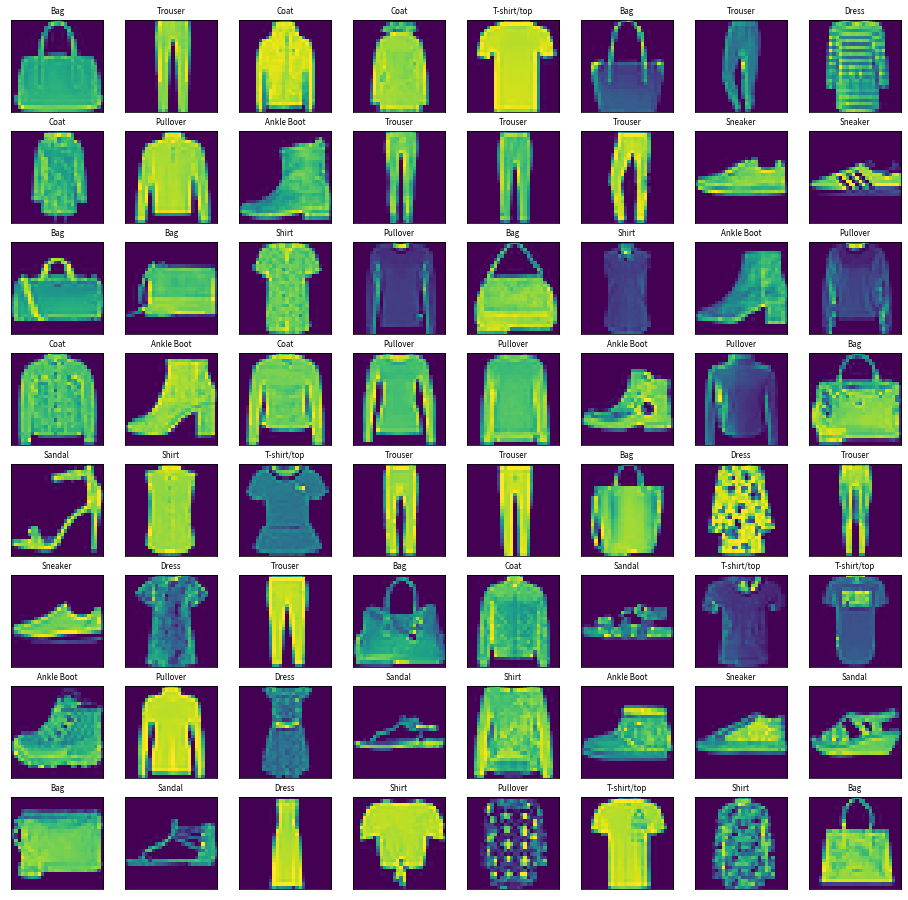

In [45]:
fig, axes = plt.subplots(8, 8, figsize=(16,16))
for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(x[i*8+j].squeeze())
        ax.set_title(labels[y[i*8+j]], fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()

In [46]:
# define Model
class Net(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1) #[1, 28, 28] -> [3, 14, 14]
        self.conv2 = nn.Conv2d(4, 16, kernel_size=3, stride=2, padding=1) #[3, 14, 14] -> [16, 7, 7]
        self.conv3 = nn.Conv2d(16, 64, kernel_size=3, stride=2, padding=0) #[16, 7, 7] -> [64, 3, 3]
        self.conv4 = nn.Conv2d(64, 256, kernel_size=3) #[64, 3, 3] -> [256, 1, 1]
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(256, 64)
        self.linear2 = nn.Linear(64, num_classes)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.linear1(x.view(x.size(0), -1)))
        x = self.linear2(x)
        return x

In [47]:
from torchsummary import summary
model = Net()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 14, 14]              40
              ReLU-2            [-1, 4, 14, 14]               0
            Conv2d-3             [-1, 16, 7, 7]             592
              ReLU-4             [-1, 16, 7, 7]               0
            Conv2d-5             [-1, 64, 3, 3]           9,280
              ReLU-6             [-1, 64, 3, 3]               0
            Conv2d-7            [-1, 256, 1, 1]         147,712
              ReLU-8            [-1, 256, 1, 1]               0
            Linear-9                   [-1, 64]          16,448
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 174,722
Trainable params: 174,722
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [48]:
from datetime import datetime

def printbar():
    now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('========'*8 + now)

In [49]:
# training the model
import pandas as pd

def train(model, train_data, valid_data, loss_fn, optimizer, epochs, batch_size=64):
    model.train()
    columns = ['step', 'train_loss', 'valid_loss', 'train_acc', 'valid_acc']
    dfhistory = []
    for epoch in range(epochs):
        train_loss = 0
        train_accuracy = 0
        for i, (x, y) in enumerate(train_data):
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += sum(y_pred.argmax(dim=1) == y)
        model.eval()
        valid_loss = 0
        valid_accuracy = 0
        for i, (x, y) in enumerate(valid_data):
            with torch.no_grad():
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                valid_loss += loss.item()
                valid_accuracy += sum(y_pred.argmax(dim=1) == y).numpy()
        history = [epoch+1, train_loss/len(train_data), valid_loss/len(valid_data), train_accuracy/len(train_data)/batch_size, valid_accuracy/len(valid_data)/batch_size]
        dfhistory.append(history)
        printbar()
        print('epoch {}, train loss: {:.4f}, valid loss: {:.4f}, train accuracy: {:.4f}, valid accuracy: {:.4f}\n'.format(*history))
    return pd.DataFrame(dfhistory, columns=columns)

In [50]:
# define params
model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 20
dfhistory = train(model, train_loader, test_loader, loss_fn, optimizer, epochs)

================================================================2021-11-15 23:04:33
epoch 1, train loss: 0.5102, valid loss: 0.4312, train accuracy: 0.8099, valid accuracy: 0.8432

================================================================2021-11-15 23:04:47
epoch 2, train loss: 0.3683, valid loss: 0.3640, train accuracy: 0.8660, valid accuracy: 0.8642

================================================================2021-11-15 23:05:02
epoch 3, train loss: 0.3500, valid loss: 0.3863, train accuracy: 0.8710, valid accuracy: 0.8601

================================================================2021-11-15 23:05:16
epoch 4, train loss: 0.3383, valid loss: 0.3812, train accuracy: 0.8764, valid accuracy: 0.8593

================================================================2021-11-15 23:05:31
epoch 5, train loss: 0.3270, valid loss: 0.3854, train accuracy: 0.8800, valid accuracy: 0.8617

================================================================2021-11-15 23:05:45
epoch 6, tr

**任务11：使用PyTorch完成人脸关键点检测**

数据集：[https://ai-contest-static.xfyun.cn/2021/7afa865e-5ac8-48ab-9966-d88bb33cdc15/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B_%E6%95%B0%E6%8D%AE%E9%9B%86.zip](https://ai-contest-static.xfyun.cn/2021/7afa865e-5ac8-48ab-9966-d88bb33cdc15/人脸关键点检测挑战赛_数据集.zip)

[https://gitee.com/coggle/competition-baseline/blob/master/competition/%E7%A7%91%E5%A4%A7%E8%AE%AF%E9%A3%9EAI%E5%BC%80%E5%8F%91%E8%80%85%E5%A4%A7%E8%B5%9B2021/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B/face-keypoint2.ipynb](https://gitee.com/coggle/competition-baseline/blob/master/competition/科大讯飞AI开发者大赛2021/人脸关键点检测挑战赛/face-keypoint2.ipynb)

- 步骤1：搭建4层卷积 + 2层的模型完成关键点回归。

- 步骤2：使用resnet18预训练模型完成关键点回归。

In [51]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary

from sklearn.metrics import mean_absolute_error

In [52]:
# load data

path = './data/face-keypoint/'
train_df = pd.read_csv(path + 'train.csv')
train_df.fillna(train_df.mean(), inplace=True)
train_img = np.load(path + 'train.npy')
test_img = np.load(path + 'test.npy')

In [53]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.342364,38.523613,28.930840,35.577773,49.256845,68.275955,47.783946,85.361582
1,68.912604,31.409117,29.652226,33.028075,51.913358,48.408453,50.698868,79.574038
2,68.708994,40.371149,27.130820,40.940680,44.502523,69.988486,45.926427,86.221009
3,65.334176,35.471878,29.366461,37.767684,50.411373,64.934767,50.028780,74.883241
4,68.634857,29.999486,31.094571,29.616429,50.247429,51.450857,47.948571,84.394286


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          5000 non-null   float64
 1   left_eye_center_y          5000 non-null   float64
 2   right_eye_center_x         5000 non-null   float64
 3   right_eye_center_y         5000 non-null   float64
 4   nose_tip_x                 5000 non-null   float64
 5   nose_tip_y                 5000 non-null   float64
 6   mouth_center_bottom_lip_x  5000 non-null   float64
 7   mouth_center_bottom_lip_y  5000 non-null   float64
dtypes: float64(8)
memory usage: 312.6 KB


In [55]:
train_img.shape, train_df.shape, test_img.shape

((96, 96, 5000), (5000, 8), (96, 96, 2049))

In [56]:
def plot_face(idx):
    img = train_img[:,:,idx]
    point = train_df.iloc[idx, :].values.reshape(4, 2)
    plt.imshow(img)
    for i in range(4):
        plt.scatter(point[i,0], point[i,1], c='r')

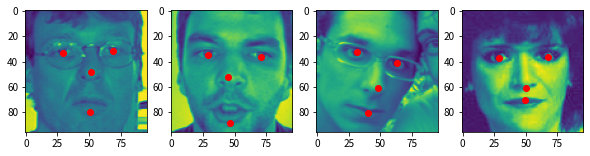

In [57]:
plt.figure(figsize=(10,40))
plt.subplot(141)
plot_face(1)
plt.subplot(142)
plot_face(11)
plt.subplot(143)
plot_face(111)
plt.subplot(144)
plot_face(1111)

In [58]:
from PIL import Image

img = Image.fromarray(train_img[:,:,0]).convert('RGB')

In [59]:
train_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,66.352102,37.610961,30.309071,37.994941,48.408151,62.726555,48.631646,78.989289
std,3.448863,3.192582,3.169910,3.079520,4.324631,5.743217,4.307072,5.360265
min,35.348452,4.424431,0.686592,6.891951,19.219701,26.374519,17.884110,31.107911
25%,65.056522,35.849826,28.780596,36.334645,46.591021,59.326014,46.570712,75.553614
50%,66.506616,37.496253,30.264288,37.858838,48.449015,63.489195,48.631722,78.779394
75%,68.022750,39.232075,31.771007,39.561229,50.400020,66.503515,50.804220,82.247267
max,94.689280,80.502649,85.039381,81.270911,89.438592,95.935644,89.438592,95.808983


In [60]:
class MyDataset(Dataset):
    def __init__(self, img, keypoint=None, transform=None):
        self.img = img
        self.keypoint = keypoint
        self.transform = transform
        
    def __getitem__(self, idx):
        img_i = Image.fromarray(self.img[:,:,idx]).convert('RGB')
        if self.transform is not None:
            img_i = self.transform(img_i)
        if self.keypoint is None:
            return img_i
        else:
            return img_i, self.keypoint[idx]
    
    def __len__(self):
        return self.img.shape[-1]

In [61]:
trainset = MyDataset(train_img[:,:,:-500], train_df.values[:-500] / 96, transform=transforms.ToTensor())
validset = MyDataset(train_img[:,:,-500:], train_df.values[-500:] / 96, transform=transforms.ToTensor())
testset = MyDataset(test_img, transform=transforms.ToTensor())

train_loader = DataLoader(trainset, batch_size=32, shuffle=True)
valid_loader = DataLoader(validset, batch_size=32, shuffle=True)
test_loader = DataLoader(testset, batch_size=32, shuffle=False)

In [62]:
for i, (img, keypoint) in enumerate(train_loader):
    print(img.shape)
    print(keypoint.shape)
    print(keypoint)
    break

torch.Size([32, 3, 96, 96])
torch.Size([32, 8])
tensor([[0.7071, 0.3719, 0.2920, 0.3593, 0.5049, 0.6474, 0.4942, 0.9104],
        [0.6764, 0.3752, 0.3077, 0.4147, 0.5085, 0.6945, 0.5250, 0.8130],
        [0.7114, 0.3966, 0.3016, 0.4001, 0.5013, 0.6909, 0.4908, 0.8415],
        [0.7176, 0.3865, 0.3364, 0.4002, 0.5247, 0.7125, 0.5477, 0.8182],
        [0.6988, 0.3689, 0.3268, 0.4209, 0.5686, 0.7521, 0.5537, 0.9083],
        [0.6834, 0.3867, 0.3153, 0.3801, 0.4912, 0.6414, 0.4945, 0.8731],
        [0.6378, 0.3481, 0.3681, 0.4622, 0.5146, 0.5933, 0.6107, 0.7404],
        [0.6792, 0.3900, 0.2791, 0.3656, 0.4255, 0.7511, 0.4303, 0.8535],
        [0.6977, 0.3938, 0.3269, 0.4386, 0.5225, 0.7035, 0.5225, 0.8542],
        [0.7173, 0.4042, 0.3419, 0.3846, 0.5240, 0.6760, 0.5044, 0.7937],
        [0.7200, 0.4046, 0.3161, 0.4103, 0.4708, 0.5822, 0.4622, 0.8457],
        [0.6776, 0.3817, 0.3492, 0.4057, 0.5189, 0.6906, 0.5385, 0.8189],
        [0.6676, 0.3516, 0.3257, 0.3456, 0.5037, 0.5553, 0.4756,

In [63]:
# 步骤1：搭建4层卷积 + 2层的模型完成关键点回归。

class FaceNet(nn.Module):
    def __init__(self, num_classes=8):
        super(FaceNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1) #[3, 96, 96] -> [16, 48, 48]
        self.conv2 = nn.Conv2d(16, 64, kernel_size=3, stride=2, padding=1) #[16, 48, 48] -> [64, 24, 24]
        self.conv3 = nn.Conv2d(64, 256, kernel_size=3, stride=2, padding=1) #[64, 24, 24] -> [256, 12, 12]
        self.conv4 = nn.Conv2d(256, 1024, kernel_size=3, stride=2, padding=1) #[256, 12, 12] -> [1024, 6, 6]
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(1024)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(1024, 256)
        self.linear2 = nn.Linear(256, num_classes)
        self.softmax = nn.Sigmoid()
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.relu(self.linear1(x.view(x.size(0), -1)))
        x = self.softmax(self.linear2(x))
        return x

In [64]:
model = FaceNet()
summary(model, input_size=(3, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             448
       BatchNorm2d-2           [-1, 16, 48, 48]              32
              ReLU-3           [-1, 16, 48, 48]               0
            Conv2d-4           [-1, 64, 24, 24]           9,280
       BatchNorm2d-5           [-1, 64, 24, 24]             128
              ReLU-6           [-1, 64, 24, 24]               0
            Conv2d-7          [-1, 256, 12, 12]         147,712
       BatchNorm2d-8          [-1, 256, 12, 12]             512
              ReLU-9          [-1, 256, 12, 12]               0
           Conv2d-10           [-1, 1024, 6, 6]       2,360,320
      BatchNorm2d-11           [-1, 1024, 6, 6]           2,048
             ReLU-12           [-1, 1024, 6, 6]               0
AdaptiveAvgPool2d-13           [-1, 1024, 1, 1]               0
           Linear-14                  [

In [65]:
# training the model
import pandas as pd

def train(model, train_data, valid_data, loss_fn, optimizer, epochs, metric=mean_absolute_error):
    columns = ['step', 'train_loss', 'valid_loss', 'train_metric', 'valid_metric']
    dfhistory = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_metric = 0
        for x, y in train_data:
            optimizer.zero_grad()
            x, y = x.float(), y.float()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
#             print(y)
            train_metric += metric(y.numpy(), y_pred.detach().numpy())
        model.eval()
        valid_loss = 0
        valid_metric = 0
        for x, y in valid_data:
            x, y = x.float(), y.float()
            with torch.no_grad():
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                valid_loss += loss.item()
                valid_metric += metric(y.numpy(), y_pred.detach().numpy())
        history = [epoch+1, train_loss/len(train_data), valid_loss/len(valid_data), train_metric/len(train_data), valid_metric/len(valid_data)]
        dfhistory.append(history)
        printbar()
        print('epoch {}, train loss: {:.4f}, valid loss: {:.4f}, train metric: {:.4f}, valid metric: {:.4f}\n'.format(*history))
    return pd.DataFrame(dfhistory, columns=columns)

In [66]:
model = FaceNet()
epochs = 50
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
dfhistory = train(model, train_loader, valid_loader, loss_fn, optimizer, epochs)

================================================================2021-11-15 23:09:41
epoch 1, train loss: 0.0299, valid loss: 0.0019, train metric: 0.1048, valid metric: 0.0303

================================================================2021-11-15 23:10:08
epoch 2, train loss: 0.0020, valid loss: 0.0019, train metric: 0.0304, valid metric: 0.0305

================================================================2021-11-15 23:10:34
epoch 3, train loss: 0.0020, valid loss: 0.0019, train metric: 0.0304, valid metric: 0.0306

================================================================2021-11-15 23:11:00
epoch 4, train loss: 0.0019, valid loss: 0.0018, train metric: 0.0301, valid metric: 0.0291

================================================================2021-11-15 23:11:26
epoch 5, train loss: 0.0019, valid loss: 0.0018, train metric: 0.0300, valid metric: 0.0297

================================================================2021-11-15 23:11:52
epoch 6, train loss: 0.0019, va

================================================================2021-11-15 23:30:04
epoch 48, train loss: 0.0002, valid loss: 0.0010, train metric: 0.0098, valid metric: 0.0201

================================================================2021-11-15 23:30:30
epoch 49, train loss: 0.0002, valid loss: 0.0010, train metric: 0.0094, valid metric: 0.0194

================================================================2021-11-15 23:30:56
epoch 50, train loss: 0.0002, valid loss: 0.0010, train metric: 0.0099, valid metric: 0.0200



In [67]:
def predict(model, test_data):
    preds = []
    with torch.no_grad():
        for data in test_data:
            y_pred = model(data).data.numpy()
            preds.extend(y_pred)
    return np.array(preds)
            

In [68]:
preds = predict(model, test_loader)
submission = pd.read_csv(path + 'sample_submit.csv')
submission[:] = preds * 96
submission.to_csv(path + 'submission_conv.csv', index=False)

In [69]:
# 步骤2：使用resnet18预训练模型完成关键点回归。

face_res18 = ResNet(arch=[2, 2, 2, 2], num_classes=8)
epochs = 10
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
dfhistory = train(face_res18, train_loader, valid_loader, loss_fn, optimizer, epochs)

================================================================2021-11-15 23:32:11
epoch 1, train loss: 0.9251, valid loss: 0.9616, train metric: 0.7315, valid metric: 0.7455

================================================================2021-11-15 23:33:28
epoch 2, train loss: 0.9247, valid loss: 0.9270, train metric: 0.7314, valid metric: 0.7310

================================================================2021-11-15 23:34:42
epoch 3, train loss: 0.9246, valid loss: 0.9299, train metric: 0.7314, valid metric: 0.7335

================================================================2021-11-15 23:35:55
epoch 4, train loss: 0.9248, valid loss: 0.9452, train metric: 0.7315, valid metric: 0.7393

================================================================2021-11-15 23:37:08
epoch 5, train loss: 0.9250, valid loss: 0.9499, train metric: 0.7321, valid metric: 0.7413

================================================================2021-11-15 23:38:21
epoch 6, train loss: 0.9248, va

In [70]:
preds = predict(model, test_loader)
submission = pd.read_csv(path + 'sample_submit.csv')
submission[:] = preds * 96
submission.to_csv(path + 'submission_res18.csv', index=False)

In [71]:
def plot_test_face(test_img=test_img, nums=64):
    fig, axes = plt.subplots(8, 8, figsize=(16,16))
    for i in range(8):
        for j in range(8):
            idx = i * 8 + j
            ax = axes[i, j]
            img = test_img[:,:,idx]
            point = preds[idx].reshape(4, 2)
            ax.imshow(img, cmap='gray')
            ax.scatter(point[:,0] * 96, point[:,1] * 96, c='r')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

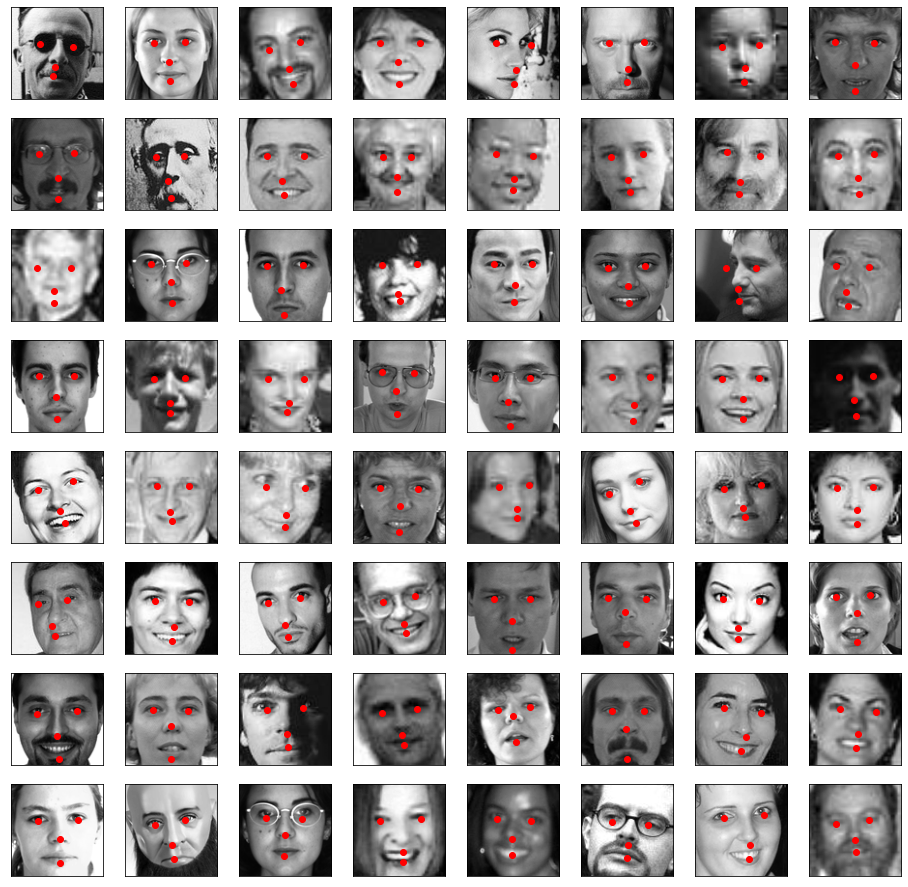

In [72]:
plot_test_face()

**任务12：使用PyTorch搭建对抗生成网络**

- 步骤1：学习对抗生成网络的原理，https://blog.csdn.net/DFCED/article/details/105175097

- 步骤2：学习DCGAN的代码实现，https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

- 步骤3：使用任务11中的人脸数据（缩放至64*64），并使用DCGAN完成训练，生成人脸。

In [73]:
# Root directory for dataset
dataroot = "./data/face-keypoint/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [80]:
class MyDataset(Dataset):
    def __init__(self, img, transform=None):
        self.img = img
        self.keypoint = keypoint
        self.transform = transform
        
    def __getitem__(self, idx):
        img_i = Image.fromarray(self.img[:,:,idx]).convert('RGB')
        if self.transform is not None:
            img_i = self.transform(img_i)
        return img_i
    
    def __len__(self):
        return self.img.shape[-1]
    
dataset = MyDataset(train_img, transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.ToTensor()]))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")


In [81]:
next(iter(dataloader)).shape

torch.Size([128, 3, 64, 64])

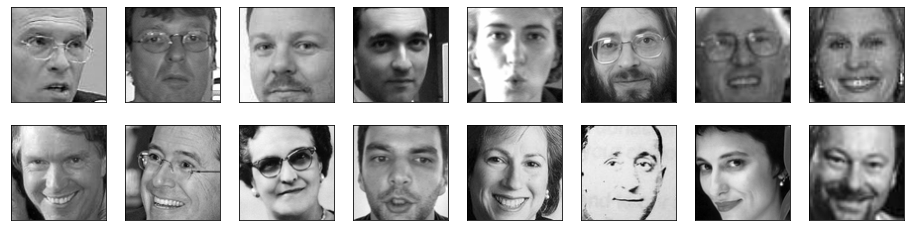

In [82]:
def plot_face():
    fig, axes = plt.subplots(2, 8, figsize=(16, 4))
    for i in range(2):
        for j in range(8):
            ax = axes[i, j]
            idx = j + 8 * i
            ax.imshow(train_img[:,:,idx], cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    
plot_face()

In [83]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [84]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
#             nn.Tanh()
            nn.Sigmoid()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [85]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Sigmoid()
  )

In [86]:
summary(netG, input_size=(100,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
          Sigmoid-14            [-1, 3,

In [87]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [88]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)


Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [89]:
summary(netD, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           3,072
         LeakyReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3          [-1, 128, 16, 16]         131,072
       BatchNorm2d-4          [-1, 128, 16, 16]             256
         LeakyReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6            [-1, 256, 8, 8]         524,288
       BatchNorm2d-7            [-1, 256, 8, 8]             512
         LeakyReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 512, 4, 4]       2,097,152
      BatchNorm2d-10            [-1, 512, 4, 4]           1,024
        LeakyReLU-11            [-1, 512, 4, 4]               0
           Conv2d-12              [-1, 1, 1, 1]           8,192
          Sigmoid-13              [-1, 1, 1, 1]               0
Total params: 2,765,568
Trainable param

In [90]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [91]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(fake)
#             img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/5][0/40]	Loss_D: 1.5786	Loss_G: 9.7862	D(x): 0.5002	D(G(z)): 0.4873 / 0.0001
[1/5][0/40]	Loss_D: 0.9397	Loss_G: 34.3841	D(x): 0.9999	D(G(z)): 0.5452 / 0.0000
[2/5][0/40]	Loss_D: 0.5804	Loss_G: 8.0666	D(x): 0.9496	D(G(z)): 0.2852 / 0.0009
[3/5][0/40]	Loss_D: 0.8844	Loss_G: 6.8631	D(x): 0.8790	D(G(z)): 0.4289 / 0.0030
[4/5][0/40]	Loss_D: 0.5482	Loss_G: 4.5676	D(x): 0.8313	D(G(z)): 0.1929 / 0.0165


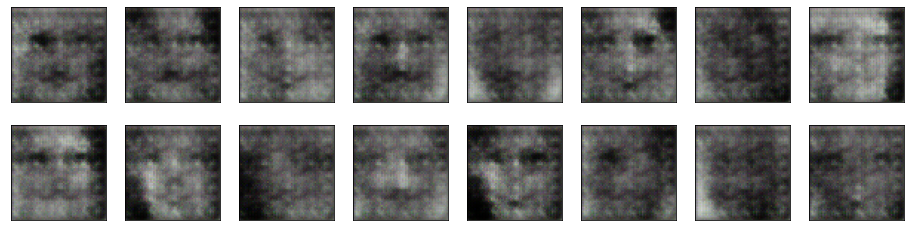

In [92]:
def plot_test_face():
    fig, axes = plt.subplots(2, 8, figsize=(16, 4))
    for i in range(2):
        for j in range(8):
            ax = axes[i, j]
            idx = j + 8 * i
            ax.imshow(img_list[1][idx].permute(1,2,0).numpy())
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    
plot_test_face()
# 数据量较小，效果不明显